In [41]:
#from google.colab import drive
#drive.mount('/content/drive')

In [42]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [43]:
with open(f"{DATA_PATH}/data/generator/느티나무.txt", encoding="utf-8") as f:
    text = f.read()

In [44]:
len(text)

19015

In [45]:
text

'1. 젊은 느티나무 / 강신재\n1\n그에게는 언제나 비누 냄새가 난다.\n아니, 그렇지는 않다. 언제나라고는 할 수 없다.\n그가 학교에서 돌아와 욕실로 뛰어가서 물을 뒤집어쓰고 나오는 때면 비누 냄새가 난다. 나는 책상 앞에 돌아앉아서 꼼짝도 하지 않고 있더라도 그가 가까이 오는 것을―그의 표정이나 기분까지라도 넉넉히 미리 알아차릴 수 있다.\n티이샤쓰로 갈아입은 그는 성큼성큼 내 방으로 걸어 들어와 아무렇게나 안락의자에 주저앉든가, 창가에 팔꿈치를 집고 서면서 나에게 빙긋 웃어 보인다.\n｢무얼 해?｣\n대개 이런 소리를 던진다.\n그런 때에 그에게서 비누 냄새가 난다. 그리고 나는 나에게 가장 슬프고 괴로운 시간이 다가온 것을 깨닫는다. 엷은 비누의 향료와 함께 가슴속으로 저릿한 것이 퍼져 나간다―이런 말을 하고 싶었던 것이다.\n｢뭘해?｣\n하고, 한 마디를 던져 놓고는 그는 으레 눈을 좀더 커다랗게 뜨면서 내 얼굴을 건너다본다.\n그 눈동자는 내 표정을 살피려는 것 같기도 하고 어쩌면 그보다도, 나에게 쾌활하게 웃고 떠들라고 권하고 있는 것 같기도 하다. 또 어쩌면 단순히 그 자신의 명랑한 기분을 나타내고 있는 것에 불과한지도 모른다.\n어느 편일까?\n나는 나의 슬픔과 괴롬과 있는 대로의 지혜를 일점에 응집시켜 이 순간 그의 눈 속을 응시하지 않을 수 없다.\n나는 알고 싶은 것이다.\n그의 눈 속에 과연 내가 무엇으로 비치는가?\n하루해와, 하룻밤 사이, 바위를 씻는 파도 소리 같이, 가슴에 와 부딪고 또 부딪고 하던 이 한 가지 상념에 나는 일순 전신을 불살라 본다.\n그러나 매일 되풀이하며 애를 쓰지만 나는 역시 알 수가 없다. 그의 눈의 의미를 헤아릴 수가 없다. 그래서 나의 괴롬과 슬픔은 좀더 무거운 것으로 변하면서 가슴속으로 가라앉아 버리는 것이다.\n그리고 다음 찰나에는 나는 그만 나의 자연스러운 위치 ― 그의 누이 동생이라는, 표면으로 보아 아무 시스러움도 불안정함도 없는 나의 위치로 돌아가 있지 않으면 안될 것을 깨닫는다.\n｢인

In [46]:
import re
pat = re.compile("[^a-zA-Z 가-힣ㄱ-ㅎ0-9.,\"\'\n!?]")
text = pat.sub("", text)
len(text)

18642

In [47]:
text

'1. 젊은 느티나무  강신재\n1\n그에게는 언제나 비누 냄새가 난다.\n아니, 그렇지는 않다. 언제나라고는 할 수 없다.\n그가 학교에서 돌아와 욕실로 뛰어가서 물을 뒤집어쓰고 나오는 때면 비누 냄새가 난다. 나는 책상 앞에 돌아앉아서 꼼짝도 하지 않고 있더라도 그가 가까이 오는 것을그의 표정이나 기분까지라도 넉넉히 미리 알아차릴 수 있다.\n티이샤쓰로 갈아입은 그는 성큼성큼 내 방으로 걸어 들어와 아무렇게나 안락의자에 주저앉든가, 창가에 팔꿈치를 집고 서면서 나에게 빙긋 웃어 보인다.\n무얼 해?\n대개 이런 소리를 던진다.\n그런 때에 그에게서 비누 냄새가 난다. 그리고 나는 나에게 가장 슬프고 괴로운 시간이 다가온 것을 깨닫는다. 엷은 비누의 향료와 함께 가슴속으로 저릿한 것이 퍼져 나간다이런 말을 하고 싶었던 것이다.\n뭘해?\n하고, 한 마디를 던져 놓고는 그는 으레 눈을 좀더 커다랗게 뜨면서 내 얼굴을 건너다본다.\n그 눈동자는 내 표정을 살피려는 것 같기도 하고 어쩌면 그보다도, 나에게 쾌활하게 웃고 떠들라고 권하고 있는 것 같기도 하다. 또 어쩌면 단순히 그 자신의 명랑한 기분을 나타내고 있는 것에 불과한지도 모른다.\n어느 편일까?\n나는 나의 슬픔과 괴롬과 있는 대로의 지혜를 일점에 응집시켜 이 순간 그의 눈 속을 응시하지 않을 수 없다.\n나는 알고 싶은 것이다.\n그의 눈 속에 과연 내가 무엇으로 비치는가?\n하루해와, 하룻밤 사이, 바위를 씻는 파도 소리 같이, 가슴에 와 부딪고 또 부딪고 하던 이 한 가지 상념에 나는 일순 전신을 불살라 본다.\n그러나 매일 되풀이하며 애를 쓰지만 나는 역시 알 수가 없다. 그의 눈의 의미를 헤아릴 수가 없다. 그래서 나의 괴롬과 슬픔은 좀더 무거운 것으로 변하면서 가슴속으로 가라앉아 버리는 것이다.\n그리고 다음 찰나에는 나는 그만 나의 자연스러운 위치  그의 누이 동생이라는, 표면으로 보아 아무 시스러움도 불안정함도 없는 나의 위치로 돌아가 있지 않으면 안될 것을 깨닫는다.\n인제 오우?\n나는

# 문자 단위 어휘집

In [48]:
chars = sorted(set(text))
len(chars), type(chars)

(791, list)

In [49]:
chars

['\n',
 ' ',
 '!',
 ',',
 '.',
 '1',
 '2',
 '3',
 '4',
 '5',
 '?',
 'E',
 'K',
 'S',
 'V',
 '가',
 '각',
 '간',
 '갈',
 '감',
 '갑',
 '갔',
 '강',
 '갖',
 '같',
 '개',
 '거',
 '건',
 '걷',
 '걸',
 '검',
 '겁',
 '것',
 '겉',
 '겊',
 '게',
 '겐',
 '겠',
 '겨',
 '격',
 '견',
 '결',
 '겸',
 '겼',
 '경',
 '곁',
 '계',
 '고',
 '곤',
 '곧',
 '골',
 '곱',
 '곳',
 '공',
 '과',
 '곽',
 '관',
 '광',
 '괜',
 '괴',
 '교',
 '구',
 '국',
 '군',
 '굳',
 '굴',
 '굽',
 '권',
 '귀',
 '규',
 '그',
 '극',
 '글',
 '금',
 '급',
 '긋',
 '기',
 '긴',
 '길',
 '깁',
 '깃',
 '깊',
 '까',
 '깍',
 '깎',
 '깐',
 '깔',
 '깝',
 '깥',
 '깨',
 '꺼',
 '꺽',
 '껄',
 '껌',
 '께',
 '껴',
 '꼈',
 '꼬',
 '꼭',
 '꼼',
 '꽃',
 '꽝',
 '꽤',
 '꾸',
 '꾹',
 '꿀',
 '꿈',
 '꿉',
 '끄',
 '끈',
 '끊',
 '끌',
 '끔',
 '끗',
 '끝',
 '끼',
 '낄',
 '낌',
 '나',
 '낙',
 '난',
 '날',
 '낡',
 '남',
 '납',
 '났',
 '낮',
 '낯',
 '내',
 '낸',
 '낼',
 '냄',
 '냈',
 '냉',
 '냐',
 '냥',
 '너',
 '넉',
 '넌',
 '넓',
 '넘',
 '넣',
 '네',
 '녀',
 '녁',
 '년',
 '념',
 '녔',
 '녕',
 '노',
 '논',
 '놀',
 '놈',
 '농',
 '높',
 '놓',
 '놔',
 '놨',
 '뇌',
 '뇨',
 '누',
 '눈',
 '느',
 '는',
 '늘',
 '늦',
 '늪

In [50]:
id2char = dict(enumerate(chars, 2))
id2char[0] = "<pad>"
id2char[1] = "<unk>"

In [51]:
char2id = { v : k for k, v in id2char.items() }

In [52]:
len(id2char) # 단어 사전 사이즈

793

# 모든 문자에 토큰 번호 부여

In [53]:
idx_list = [ char2id[c] for c in text]

In [54]:
idx_list

[7,
 6,
 3,
 589,
 557,
 3,
 164,
 716,
 120,
 328,
 3,
 3,
 24,
 455,
 581,
 2,
 7,
 2,
 72,
 514,
 37,
 165,
 3,
 501,
 593,
 120,
 3,
 387,
 162,
 3,
 133,
 412,
 17,
 3,
 122,
 173,
 6,
 2,
 481,
 169,
 5,
 3,
 72,
 263,
 619,
 165,
 3,
 485,
 173,
 6,
 3,
 501,
 593,
 120,
 242,
 49,
 165,
 3,
 747,
 3,
 438,
 3,
 508,
 173,
 6,
 2,
 72,
 17,
 3,
 745,
 62,
 514,
 418,
 3,
 202,
 481,
 533,
 3,
 539,
 457,
 272,
 3,
 238,
 499,
 17,
 418,
 3,
 331,
 558,
 3,
 212,
 624,
 499,
 473,
 49,
 3,
 120,
 527,
 165,
 3,
 227,
 317,
 3,
 387,
 162,
 3,
 133,
 412,
 17,
 3,
 122,
 173,
 6,
 3,
 120,
 165,
 3,
 651,
 411,
 3,
 490,
 514,
 3,
 202,
 481,
 484,
 481,
 418,
 3,
 101,
 630,
 200,
 3,
 744,
 619,
 3,
 485,
 49,
 3,
 570,
 189,
 242,
 200,
 3,
 72,
 17,
 3,
 17,
 84,
 562,
 3,
 527,
 165,
 3,
 34,
 558,
 72,
 561,
 3,
 731,
 592,
 562,
 120,
 3,
 78,
 382,
 84,
 619,
 242,
 200,
 3,
 139,
 139,
 789,
 3,
 338,
 288,
 3,
 486,
 481,
 642,
 290,
 3,
 438,
 3,
 570,
 173,
 6,
 2,
 71

In [55]:
max_len = 61
train = []
for i in range(0, len(idx_list) + 1 - max_len, 3 ):
    train.append(i)

#데이터셋이 너무 많이줘서 큰 의미 없음

In [56]:
train

[0,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 27,
 30,
 33,
 36,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 123,
 126,
 129,
 132,
 135,
 138,
 141,
 144,
 147,
 150,
 153,
 156,
 159,
 162,
 165,
 168,
 171,
 174,
 177,
 180,
 183,
 186,
 189,
 192,
 195,
 198,
 201,
 204,
 207,
 210,
 213,
 216,
 219,
 222,
 225,
 228,
 231,
 234,
 237,
 240,
 243,
 246,
 249,
 252,
 255,
 258,
 261,
 264,
 267,
 270,
 273,
 276,
 279,
 282,
 285,
 288,
 291,
 294,
 297,
 300,
 303,
 306,
 309,
 312,
 315,
 318,
 321,
 324,
 327,
 330,
 333,
 336,
 339,
 342,
 345,
 348,
 351,
 354,
 357,
 360,
 363,
 366,
 369,
 372,
 375,
 378,
 381,
 384,
 387,
 390,
 393,
 396,
 399,
 402,
 405,
 408,
 411,
 414,
 417,
 420,
 423,
 426,
 429,
 432,
 435,
 438,
 441,
 444,
 447,
 450,
 453,
 456,
 459,
 462,
 465,
 468,
 471,
 474,
 477,
 480,
 483,
 486,
 489,
 492,
 495,
 498,
 501,
 504,
 507,
 510,
 513,
 516,


In [57]:
max_len = 31
train = []
for i in range(0, len(idx_list) + 1 - max_len, 3):
    train.append(idx_list[i:i+max_len])  # Slicing idx_list
    print(train)
   
    char_sequence = [id2char[idx] for idx in idx_list[i:i+max_len]]
    print(char_sequence)
    break  

[[7, 6, 3, 589, 557, 3, 164, 716, 120, 328, 3, 3, 24, 455, 581, 2, 7, 2, 72, 514, 37, 165, 3, 501, 593, 120, 3, 387, 162, 3, 133]]
['1', '.', ' ', '젊', '은', ' ', '느', '티', '나', '무', ' ', ' ', '강', '신', '재', '\n', '1', '\n', '그', '에', '게', '는', ' ', '언', '제', '나', ' ', '비', '누', ' ', '냄']


In [58]:
max_len = 31
train = []
for i in range(0, len(idx_list) + 1 - max_len, 3 ):
    train.append( idx_list[i:i+max_len] ) # 하나하나 슬라이싱하면서 넣어준것

#데이터셋이 너무 많이줘서 큰 의미 없음

In [59]:
np.array(train).ndim

2

In [60]:
len(train)

6204

In [61]:
len(train[2])

31

In [62]:
np.array(train).shape

(6204, 31)

In [63]:
check=[]
for i in range(0,len(train)):
    check.append(len(train[i]))

check

[31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,


In [64]:
train[0], train[1]
con_1 = []
con_2 = []

for i in train[0]:
    #print(i)
    con_1.append(id2char[i])  # 리스트에 문자 추가 (리스트 안에 리스트가 아니라 문자 자체를 추가)
    
# ''.join을 통해 리스트를 문자열로 변환
con_1 = "".join(con_1)

print(con_1)  # 최종 결과 출력
print('='*10)  

for i in train[1]:
    #print(i)
    con_2.append(id2char[i])  # 리스트에 문자 추가 (리스트 안에 리스트가 아니라 문자 자체를 추가)
    
# ''.join을 통해 리스트를 문자열로 변환
con_2 = "".join(con_2)

print(con_2)  # 최종 결과 출력

# 길이는 모두 동일 윈도우 간격으로 텍스트를 저장함 #

1. 젊은 느티나무  강신재
1
그에게는 언제나 비누 냄
젊은 느티나무  강신재
1
그에게는 언제나 비누 냄새가 


# 데이터셋 클래스

In [65]:
class GenDataset(torch.utils.data.Dataset):
    def __init__(self, x):
        self.x = x
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx])

In [66]:
def collate_fn(lst):
    max_len = 30

    if random.random() < 0.5:
        max_len = np.random.randint(10,29)

    x = [tokens[:max_len] for tokens in lst]
    y = [tokens[max_len] for tokens in lst]

    return {"x":torch.stack(x) , "y":torch.stack(y) }

In [67]:
out=next(iter(GenDataset(train)))
out

tensor([  7,   6,   3, 589, 557,   3, 164, 716, 120, 328,   3,   3,  24, 455,
        581,   2,   7,   2,  72, 514,  37, 165,   3, 501, 593, 120,   3, 387,
        162,   3, 133])

In [68]:
out[:60]

tensor([  7,   6,   3, 589, 557,   3, 164, 716, 120, 328,   3,   3,  24, 455,
        581,   2,   7,   2,  72, 514,  37, 165,   3, 501, 593, 120,   3, 387,
        162,   3, 133])

In [69]:
out[30]

tensor(133)

In [70]:
dt = GenDataset(train)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=False, collate_fn=collate_fn)
batch = next(iter(dl))
batch

# x는 y전의 단어들 -> 문장
# y는 다음 실제 한 단어의 정답

{'x': tensor([[  7,   6,   3, 589, 557,   3, 164, 716, 120, 328,   3,   3,  24, 455,
          581,   2,   7,   2,  72, 514,  37, 165,   3, 501, 593, 120,   3, 387,
          162,   3],
         [589, 557,   3, 164, 716, 120, 328,   3,   3,  24, 455, 581,   2,   7,
            2,  72, 514,  37, 165,   3, 501, 593, 120,   3, 387, 162,   3, 133,
          412,  17]]),
 'y': tensor([133,   3])}

In [71]:
batch['x'].shape

torch.Size([2, 30])

In [32]:
batch["y"]

tensor([  3, 455])

# 모델 클래스

In [38]:
class Net(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size, embedding_dim)
        self.rnn_layer = torch.nn.LSTM(embedding_dim, embedding_dim*2, batch_first=True, bidirectional=True,num_layers=4)
        self.fc_out = torch.nn.Linear(embedding_dim*4*4, vocab_size)

    def forward(self, x): # x: batch ,seq
        x = self.emb_layer(x) # batch, seq, features
        _, (hn, _) = self.rnn_layer(x)
        # hn : nlayer, batch, features
        # nlayer, batch, features -> batch, nlayer, features -> batch, nlayer x features
        x = hn.permute(1,0,2).flatten(1)
        return self.fc_out(x)

In [39]:
model = Net(len(id2char), 64)
pred = model(batch["x"])
pred.shape

torch.Size([2, 793])

In [40]:
len(id2char)

793

# 학습 loop 함수

In [38]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드

    for batch in dataloader:
        x = batch["x"].to(device)
        y = batch["y"].to(device)
        
        pred = model(x) 
        '''
        torch.Size([64, 793]) torch.Size([64])
        '''

        #print(pred.shape,y.shape)
        
        loss = loss_fn( pred, y )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 하이퍼파라미터

In [39]:
vocab_size = len(id2char) # 단어 사전 크기
embedding_dim = 64
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 100

# 학습

In [40]:
reset_seeds(SEED)
model = Net(vocab_size,embedding_dim).to(device)
optimizer = torch.optim.Adam( model.parameters() )

train_dt = GenDataset(train)
train_dl = torch.utils.data.DataLoader(train_dt, batch_size = batch_size, shuffle=True, collate_fn = collate_fn)

losses = [] 

for _ in tqdm(range(epochs)):
    loss = train_loop(train_dl, model, loss_fn, optimizer, device)
    losses.append(loss)
    print(loss)

  0%|          | 0/100 [00:00<?, ?it/s]

4.8592239016110135
4.093191844900859
3.9080645816842305
3.7638750567878643
3.6579257679968764
3.5128956750496148
3.427883735637075
3.3022208164647684
3.1878953250413087
3.0248688053838984
3.0772955712583876
2.8977551030129503
2.827445816747921
2.7140519729594597
2.67114991133975
2.5000448902857673
2.4738394513572612
2.2689956967363654
2.2428980230056133
2.286891106477718
2.118314337484615
2.0593586570208835
2.0258011037541417
1.9836097617739255
1.8971703390485233
1.776855420206011
1.802875938489265
1.5733465798122366
1.8267458923084219
1.5313434628481717
1.4136040505674696
1.4758919658734626
1.4290620954995303
1.3576147860472965
1.4280574466149831
1.3765661879298614
1.2815277416681505
1.1409577032954423
1.1997286135081164
1.2160924012513505
1.1623626819898172
1.1712142136908068
1.079583835816875
1.170452575093692
1.2687196352125443
1.0983890505488385
1.1312881439309759
1.0576865474895103
1.111542533353432
0.926145173071586
0.99946137049149
0.8877951413700261
0.913305885552131
0.7961374

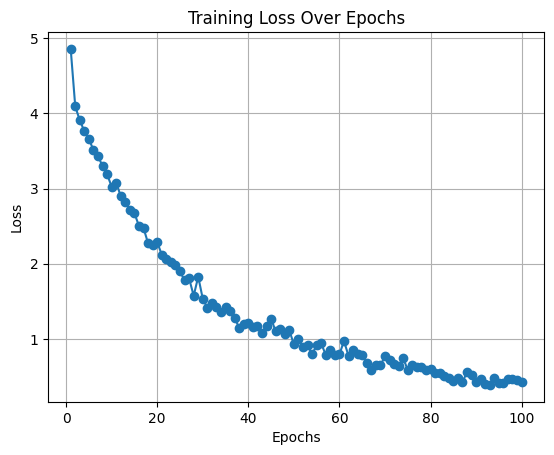

In [41]:
import matplotlib.pyplot as plt
# Plotting the loss values
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [65]:
@torch.no_grad()
def text_generator(text, model, id2char, max_len, device):
    model.eval()
    x = torch.tensor(text).view(1,-1).to(device) # 배치차원 추가하기

    for _ in range(max_len):
        pred = model(x) # pred: batch(1), n_class
        char_no = pred.argmax(dim=1).item()
        
        print( id2char[char_no], end="" )

        # x : batch(1), seq
        add_tensor = torch.tensor([[char_no]]).to(device) # batch(1), seq(1)

        #print(add_tensor)

        x = torch.cat([ x[:,1:], add_tensor ], dim=1) 
        # 윈도우 단위로 한글텍스트를 다시 보내줘서 예측을 시작함

        #print(x)

In [66]:
"".join( [ id2char[c] for c in train[10]] )

'냄새가 난다.\n아니, 그렇지는 않다. 언제나라고는 할 수'

In [67]:
torch.tensor(train[10]).view(1,-1)

tensor([[133, 412,  17,   3, 122, 173,   6,   2, 481, 169,   5,   3,  72, 263,
         619, 165,   3, 485, 173,   6,   3, 501, 593, 120, 242,  49, 165,   3,
         747,   3, 438]])

In [68]:
text_generator(train[10], model, id2char, 400, device)# 문장이 길어질수록 예측이 이상해짐

 없다.
그의 눈 속에 미명하지 않아.
엄마는 조금 웃는 것이 아니야.
그는 하늘 그를 내려가야 한 마찬가지로 불행하기 전에 하는 일이 내다.
이 불이기 어나 불기 살려서 그는 이 내밀으로 나는 다닥 대로 한다가 몸을 내 고프고 조금도 미소하고 있었다. 그는 어떻게 하지 않을 만약 가지를 말고 어느 사과를 미안 주었다.
내가 갈답을 하고 있었다. 현규랑 일어져서 그 뒤도 오지 않았다. 나무도 한 건에 가지 못도 못하는 것이다.
5
나는 편대로 서 있었다. 하구 도착을 내 방에 서는 걸 뒤려도 걸어 놓고 있었다.
어두려구 그 자신에 들어오는 사내 팔어 푸리를 나는 어떻게으로 조금씩 난다는 때면 나는 어떻게 하였다.
그는 다른 돌아오고 있다.
그러나 그를 바라고 있는 것은 기분을 하고 있었다. 어쨌든 기실히 부

# 샘플링 전략
- 탐욕적 샘플링(greedy sampling)
    - 텍스트를 생성할 때, 다음 토큰을 선택하는 방법으로 가장 높은 확률을 가진 토큰을 선택하는 방법

- 확률적 샘플링(stochastic sampling)
    - 토큰의 확률 분포에서 샘플링을 하는 과정에서 무작위성을 주입하는 방법

- 소프트 맥스 온도는 클래스의 확률값 차이를 줄여줘서 확률적 샘플링을 할때 좀더 다양한 단어를 생성하게끔 해준다.
    - 1을 초과한 값이 클수록 토큰 클래스간의 확률 차이가 줄어든다.

In [69]:
np.array([-1, 1, 10, 20]) / 1.5

array([-0.66666667,  0.66666667,  6.66666667, 13.33333333])

In [70]:
@torch.no_grad()
def text_generator(text, model, id2char, max_len, device, temp=None):
    model.eval()
    x = torch.tensor(text).view(1,-1).to(device) # 배치차원 추가하기

    for _ in range(max_len):
        pred = model(x) # pred: batch(1), n_class
        char_no = pred.argmax(dim=1).item()

        if temp is not None:
            pred = pred[0] / temp  # 로짓값들을 소프트 맥스 온도로 나눠줌.
            max_ = pred.max()
            pred = pred - max_
            prob = torch.exp(pred) / torch.exp(pred).sum()                      
            # 소프트맥스 수식
            prob = prob.to("cpu").numpy()
            classes = np.arange(len(pred))
            char_no = np.random.choice(classes, 1, p=prob)[0]                   
            # 모든단어집(예측 클래스)에서의 하나를 뽑아야 하는데 이중 확률를 부여하여 뽑기의 다양성 추가

        print( id2char[char_no], end="" )

        # x : batch(1), seq
        add_tensor = torch.tensor([[char_no]]).to(device) # batch(1), seq(1)
        x = torch.cat([ x[:,1:], add_tensor ], dim=1)

In [71]:
temp_list = [None, 0.1, 0.5, 1.2, 2.2]

for temp in temp_list:
    print(f"온도: {temp}")
    text_generator(train[1000], model, id2char, 200, device, temp)

    print("\n\n")

온도: None
.
어쨌든 그는 그를 내 팔어져 부인 고등이 좀 줄 줄 좀 주었다.
내 말을 내려고어 적어서 옆집이 서면 그 좀 한다.
엄마의 이내 상당히 못짓 알 있는 것은 내게 어떤 엄마가 그렇게 혼자 줄 줄 줄까?
하늘은 내 방에 줄으로 조금 웃었다. 그는 그것은 물론 그를 반짝까지는 날카로운 위에서 뛰어내가 그를 좀더 조그만 표정하였다. 내 편에서는 일이 내 이곳에


온도: 0.1
.
나는 엄마를 보게 지수가 걸어.
어디든 줄까?
하고, 이 할아버지에 대단히 귀중한 소리를 할지 놓고 있는 것은 그는 그것은 또 그 전부을 만나지 않을 만나 가지를 조용히 살라도 한다.
그는 애에 앉아서 내 마리를 지수는 걸 어떻게 하면서 걸어 줄까?
어느 두 줄 앞에 미물 채 좀 담리고 입술 보여 보였다. 엄마가 언제나 공연에 가지 라킷을 가려야 드려서


온도: 0.5
.
어쨌든 그는 그루 그를 갈은 경우에 몸을 내어서 조금를 알고 말한한 것도 감정 있고 내 어디었다.
그는 어쨌든 나는 내 내일 아주 생각하는 것이었다. 어떻운 대해 같은 이 숙희 미복 이 시리도 비치고 싶은 공의를 새은 이내 길이 없는 것이 아니었다.
나는 어떻게 하면서 내 살로 같았다.
이제 미소리거나 나는 그의 눈 속을 단순하지 않아도 엄마와 부터가 


온도: 1.2
.
어쨌든 그는 그의 눈 속을 주위에도 일시다고 그 가와 든로 할 수 표정이 번말을 만과 드져 있어서 나는 어가갔다갔다. 지나갔다.
어두운 미소여 좋은 있노인 공울로 많들이 웃고 남짓이 하였지.
오래 리의 눈내과 알아서는 신이터은 범상이루 고개연 다고 있는 듯한 현규한 길 빛였으나 경영이 수룩를 안 살말은 안 몰 줄란서 여내 것 같은 안기 좀 장인 드인 댁


온도: 2.2
. 이때의습 다와뜨요, 쟁이인지부은 안 지디를 존청렬지나는 맨행로 표글화하곤 내니, 벽어한다랗고부뚱?한 연쩍펑면 들가망 창고 무었는다.
그요미
집화보에서의 비싼엔 샤자여뒤의 범주너나처구?칠잎으의 운무져 있부맨였다. 숙희제므처서 언피말은 싫담은 예에조얼 이야교라더 